In [3]:
import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

In [4]:
"""Our system of differential equations belongs to the complex space, that is why we implemented the code suggested in"""
"""https://stackoverflow.com/questions/19910189/scipy-odeint-with-complex-initial-values."""

import time
import numpy as np
from scipy.integrate import odeint
from scipy.special import zeta
from random import choices

def odeintz(func, z0, t, **kwargs):
   
    
    """An odeint-like function for complex valued differential equations.

    Inputs:
    ----------
      -func: function associated to dr/dt=f(x;t), where x is the set of parameters and variables to be determined
      -z0: 1d array with length N*(5N-1)/2
      -t: 1d array from t=0 to t=tf (parameter set by the user)
      - **kwargs: keyword arguments related with external functions to be used in odeint
    
    Return:
      -z: multivariable array with the solution of the differential equation associated with each variable"""

    # Disallow Jacobian-related arguments.
    _unsupported_odeint_args = ['Dfun', 'col_deriv', 'ml', 'mu']
    bad_args = [arg for arg in kwargs if arg in _unsupported_odeint_args]
    if len(bad_args) > 0:
        raise ValueError("The odeint argument %r is not supported by "
                         "odeintz." % (bad_args[0],))

    # Make sure z0 is a numpy array of type np.complex128.
    z0 = np.array(z0, dtype=np.complex128, ndmin=1)

    def realfunc(x, t, *args):
        z = x.view(np.complex128)
        dzdt = func(z, t, *args)
        # func might return a python list, so convert its return
        # value to an array with type np.complex128, and then return
        # a np.float64 view of that array.
        return np.asarray(dzdt, dtype=np.complex128).view(np.float64)

    result = odeint(realfunc, z0.view(np.float64), t, **kwargs)

    if kwargs.get('full_output', False):
        z = result[0].view(np.complex128)
        infodict = result[1]
        return z, infodict
    else:
        z = result.view(np.complex128)
        return z

In [5]:
def Jij(J,j,w,epsilon,N,Vect):
    
    norm=np.linalg.norm(np.array(Vect[j])-np.array(Vect[w]))
    
    return (J/N)*(1/norm**epsilon)*(1/dist_ar**epsilon)
    
    

In [51]:
#length_side=2
#N=length_side**3

N=40
J=1
epsilon=0

refgamma=0  # 0.2  #Fixed
refomega=0.125



Gamma_phi=refgamma*J
Omega=refomega*J
dist_ar=1


#for -z

def init_vect(N=N):
    rx=[]
    ry=[]
    rz=[]
    for j in range(N):
        
        a=(choices([-1,1]))[0]
        b=(choices([-1,1]))[0]
        
        rx.append(a)
        ry.append(b)
        rz.append(-1)


    return rx+ry+rz



def Vectors(length_side):
    vect=[]
    for j in range(length_side**3):
        b=j//length_side**2
        c=(j-b*length_side**2)//length_side
        d=j-b*length_side**2-c*length_side
        vect.append([b,c,d])
    return vect


#Vect=Vectors(length_side)


def Jij(J,j,w,epsilon,N,Vect):
    
    norm=np.linalg.norm(np.array(Vect[j])-np.array(Vect[w]))
    
    return (J/N)*(1/norm**epsilon)*(1/dist_ar**epsilon)

Vect=[]

def vectorsR(r, t,N=N,J=J,epsilon=epsilon,refgamma=refgamma,refomega=refomega,Vect=Vect):   
    
    #matrix_zero=np.zeros((int(3*N),int(3*N)),dtype = 'complex_')
    matrix_zero=np.zeros((int(3*N),int(3*N)))
    
    
    drdt =  np.matmul(matrix_zero, r)  #matrix_zero @ r   #sum of the linear and the constant part
    #drdt = matrix_zero @ r
    
    
    ###Define Vect which is an array of coordinates of size N
    
    
    for i in range(N):
        
        
        drdt[i]=drdt[i]-refgamma*r[i]   #s_i^x
        drdt[i+N]=drdt[i+N]-refomega*r[i+2*N]-refgamma*r[i+N]    #s_i^y
        drdt[i+2*N]=drdt[i+2*N]+refomega*r[i+N]    #s_i^z
    
    
       
        for j in range(N):
            
            if j!=i:
                #norm=np.linalg.norm(np.array(Vect[j])-np.array(Vect[w]))
                
                
                #drdt[j]=drdt[j]-2* r[j+N]*r[w+2*N]*(J/N)*(1/norm**epsilon)*(1/dist_ar**epsilon)  #s_i^x
                #drdt[j+N]=drdt[j+N]+2* r[j]*r[w+2*N]*(J/N)*(1/norm**epsilon)*(1/dist_ar**epsilon)  #s_i^y  
                
                drdt[i]=drdt[i]-(2)* r[i+N]*r[j+2*N]*(J/N)  #s_i^x  all to all
                drdt[i+N]=drdt[i+N]+(2)* r[i]*r[j+2*N]*(J/N)  #s_i^y             
        
               
    return drdt





40 1.0173370838165283


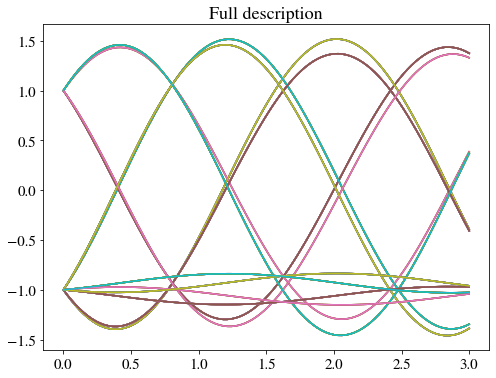

In [52]:
r0=init_vect(N)

init_time=0
final_time=3
steps=100


t = np.linspace(init_time, final_time, steps)

import time

t0=time.time()

#z=odeintz(vectorsR, r0, t)#, args=(N,L))

z=odeint(vectorsR, r0, t)#, args=(N,L))


t1=time.time()

print(N,t1-t0)

plt.title("Full description")

for j in range(3*N):
    plt.plot(t,np.real(z[:,j]),label="Re"+str(j))
    #plt.plot(t,np.imag(z[:,j]),'-.',label="Im"+str(j))

In [53]:
def S_array(z):
    Sx=z[:,0]
    Sy=z[:,N]
    Sz=z[:,2*N]
    
    for j in range(1,N):
        Sx=np.add(Sx,z[:,j])
        Sy=np.add(Sy,z[:,N+j])
        Sz=np.add(Sz,z[:,2*N+j])
    
    Sx=Sx/2
    Sy=Sy/2
    Sz=Sz/2
    
    
    return Sx, Sy, Sz


def history(n):
    
    count=1

    z0=init_vect(N)
    z = odeint(vectorsR, z0, t)
    
    Sx=S_array(z)[0]
    Sy=S_array(z)[1]
    Sz=S_array(z)[2]
    
    Sxx=(Sx)**2
    Syy=(Sy)**2
    Szz=(Sz)**2
    

    for j in range(2,n+1):
        
        count=count+1
        
        z0=init_vect(N)
        z = odeint(vectorsR, z0, t)
        
        Sx = Sx+S_array(z)[0]
        Sy = Sy+S_array(z)[1]
        Sz = Sz+S_array(z)[2]
        
        
        Sxx = Sxx+(S_array(z)[0])**2
        Syy = Syy+(S_array(z)[1])**2
        Szz = Szz+(S_array(z)[2])**2
        
        
    return Sx/count,Sy/count,Sz/count,Sxx/count,Syy/count,Szz/count

In [54]:
t=np.linspace(0,3,60)

t0=time.time()
a=history(500)
t1=time.time()

print(t1-t0)



458.9247558116913


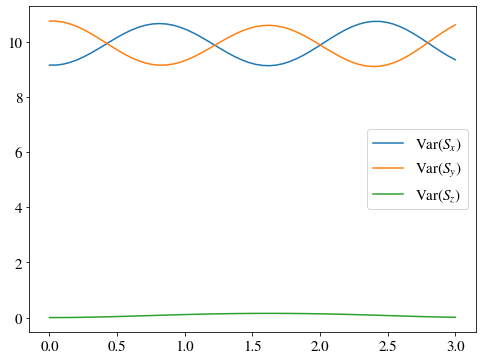

In [55]:

plt.plot(t,a[3]-(a[0])**2,label="Var($S_x$)")
plt.plot(t,a[4]-(a[1])**2,label="Var($S_y$)")
plt.plot(t,a[5]-(a[2])**2,label="Var($S_z$)")
plt.legend();


In [56]:
t

array([0.        , 0.05084746, 0.10169492, 0.15254237, 0.20338983,
       0.25423729, 0.30508475, 0.3559322 , 0.40677966, 0.45762712,
       0.50847458, 0.55932203, 0.61016949, 0.66101695, 0.71186441,
       0.76271186, 0.81355932, 0.86440678, 0.91525424, 0.96610169,
       1.01694915, 1.06779661, 1.11864407, 1.16949153, 1.22033898,
       1.27118644, 1.3220339 , 1.37288136, 1.42372881, 1.47457627,
       1.52542373, 1.57627119, 1.62711864, 1.6779661 , 1.72881356,
       1.77966102, 1.83050847, 1.88135593, 1.93220339, 1.98305085,
       2.03389831, 2.08474576, 2.13559322, 2.18644068, 2.23728814,
       2.28813559, 2.33898305, 2.38983051, 2.44067797, 2.49152542,
       2.54237288, 2.59322034, 2.6440678 , 2.69491525, 2.74576271,
       2.79661017, 2.84745763, 2.89830508, 2.94915254, 3.        ])

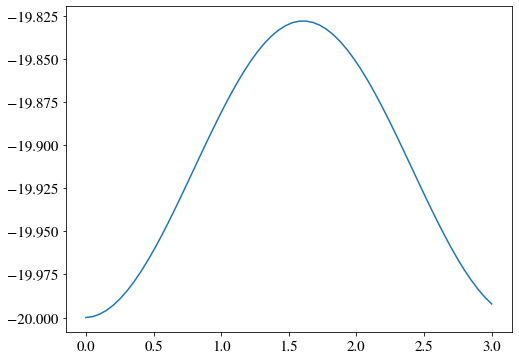

In [57]:

plt.plot(J*t,a[2])



In [58]:
refomega

0.125

In [59]:
a[2]

array([-20.        , -19.99942706, -19.99801844, -19.99578796,
       -19.99275747, -19.98895664, -19.9844227 , -19.97920002,
       -19.97333973, -19.96689918, -19.95994139, -19.95253442,
       -19.94475073, -19.93666645, -19.92836062, -19.91991445,
       -19.91141051, -19.90293191, -19.89456149, -19.88638105,
       -19.8784705 , -19.8709071 , -19.86376472, -19.85711308,
       -19.85101715, -19.84553642, -19.84072438, -19.83662801,
       -19.83328726, -19.83073474, -19.82899534, -19.82808602,
       -19.82801563, -19.82878484, -19.8303861 , -19.83280377,
       -19.83601421, -19.83998604, -19.84468045, -19.85005158,
       -19.85604694, -19.86260795, -19.86967049, -19.87716556,
       -19.8850199 , -19.89315678, -19.90149666, -19.90995805,
       -19.91845826, -19.92691423, -19.93524331, -19.94336411,
       -19.95119727, -19.95866624, -19.96569803, -19.97222393,
       -19.97818016, -19.98350851, -19.98815691, -19.99207993])

In [33]:

Omega1=np.array([-20.        , -19.94075143, -19.82667628, -19.6592028 ,
       -19.44038504, -19.17283971, -18.85966858, -18.5043706 ,
       -18.11074818, -17.68281158, -17.22468556, -16.74052151,
       -16.23441776, -15.71035001, -15.17211295, -14.62327365,
       -14.0671364 , -13.50671865, -12.94473677, -12.38360071,
       -11.82541609, -11.27199239, -10.72485603, -10.18526709,
        -9.65423855,  -9.13255731,  -8.62080602,  -8.11938531,
        -7.62853581,  -7.14835971,  -6.67884167,  -6.21986875,
        -5.77124957,  -5.33273248,  -4.90402282,  -4.48479944,
        -4.07473027,  -3.67348729,  -3.28076072,  -2.89627243,
        -2.51978862,  -2.15113155,  -1.79019022,  -1.43692975,
        -1.09139911,  -0.75373699,  -0.42417539,  -0.10304059,
         0.20924886,   0.51218718,   0.80518978,   1.0876048 ,
         1.35872758,   1.61781768,   1.86411762,   2.09687266,
         2.31535056,   2.51886035,   2.7067692 ,   2.87851644])

Omega2=np.array([-20.        , -19.88348189, -19.56262584, -19.04377671,
       -18.33687522, -17.45486355, -16.4129593 , -15.22787429,
       -13.91705138, -12.49798277, -10.98765504,  -9.40214772,
        -7.75639363,  -6.06409453,  -4.33777466,  -2.58894771,
        -0.82836985,   0.93365051,   2.68691507,   4.42099876,
         6.12494156,   7.78699645,   9.39445939,  10.93360482,
        12.38974537,  13.74742669,  14.99075832,  16.10386823,
        17.07145486,  17.87939748,  18.5153755 ,  18.96944312,
        19.23450716,  19.30666506,  19.18537392,  18.87343948,
        18.37683203,  17.70435297,  16.86718807,  15.87839077,
        14.75234083,  13.50422079,  12.14954605,  10.70377554,
         9.18202001,   7.59885467,   5.96823405,   4.30349886,
         2.61745826,   0.92252671,  -0.76910868,  -2.44531504,
        -4.09385946,  -5.70229543,  -7.2579081 ,  -8.74773058,
       -10.15863707, -11.4775105 , -12.69147554, -13.78818067])


Omega3=np.array([-20.        , -19.81488888, -19.1745627 , -18.09953814,
       -16.62303006, -14.78826434, -12.64539588, -10.24854797,
        -7.65339132,  -4.91551003,  -2.0896116 ,   0.77053002,
         3.61163319,   6.38027668,   9.02240753,  11.48329441,
        13.70815979,  15.64360376,  17.23977382,  18.45305915,
        19.2489355 ,  19.60449999,  19.51025146,  18.97079574,
        18.0043614 ,  16.6412423 ,  14.92147687,  12.8921826 ,
        10.60496981,   8.11377582,   5.47332225,   2.73824355,
        -0.03720481,  -2.79905403,  -5.49340113,  -8.06632743,
       -10.46419044, -12.63444569, -14.52704337, -16.09631508,
       -17.30314254, -18.11711232, -18.51833129, -18.49861861,
       -18.06189347, -17.22371985, -16.01011429, -14.45583689,
       -12.60244406, -10.49637843,  -8.18731303,  -5.72687497,
        -3.16777094,  -0.56324486,   2.03326826,   4.56845964,
         6.98959729,   9.24523332,  11.28622707,  13.06706535])

Omega4=np.array([-20.        , -19.59030895, -18.36581657, -16.38731332,
       -13.74922329, -10.57075799,  -6.98694317,  -3.14130158,
         0.81898732,   4.74570851,   8.49110927,  11.90975587,
        14.86208968,  17.22038744,  18.87684998,  19.75251183,
        19.80497224,  19.03293703,  17.47631688,  15.21188409,
        12.34572735,   9.00446331,   5.3271309 ,   1.45902076,
        -2.45228664,  -6.25930701,  -9.81665609, -12.98394812,
       -15.63047317, -17.64178928, -18.92748871, -19.42869278,
       -19.12357396, -18.02953475, -16.20149676, -13.72676899,
       -10.71778227,  -7.30430366,  -3.62650254,   0.17041406,
         3.94005717,   7.53787434,  10.8242597 ,  13.66854071,
        15.95416712,  17.58482843,  18.49069151,  18.63365233,
        18.01053011,  16.65349531,  14.62761127,  12.02599539,
         8.9635559 ,   5.57037912,   1.98561155,  -1.64777297,
        -5.18740409,  -8.49553287, -11.44308134, -13.91400141])

Omega5=np.array([-20.        , -19.39253122, -17.53928293, -14.57314344,
       -10.69858216,  -6.16993011,  -1.27093043,   3.70099692,
         8.44619357,  12.6732224 ,  16.11225595,  18.53334157,
        19.76787532,  19.72819095,  18.41901575,  15.93668943,
        12.45649436,   8.21264958,   3.47712578,  -1.45813791,
        -6.29449875, -10.73753147, -14.50925484, -17.36433478,
       -19.10999587, -19.62595936, -18.87878588, -16.92588307,
       -13.90787239, -10.03209532,  -5.5524913 ,  -0.75075019,
         4.07890812,   8.64209085,  12.65648505,  15.86669149,
        18.06227609,  19.09673971,  18.90293626,  17.50043082,
        14.99257206,  11.55443926,   7.41545722,   2.84105915,
        -1.88369898,  -6.46812903, -10.62907744, -14.10536563,
       -16.67442152, -18.16981871, -18.49648858, -17.63986511,
       -15.66655222, -12.71658694,  -8.9896819 ,  -4.72883368,
        -0.20407026,   4.30253573,   8.51110342,  12.15866761])

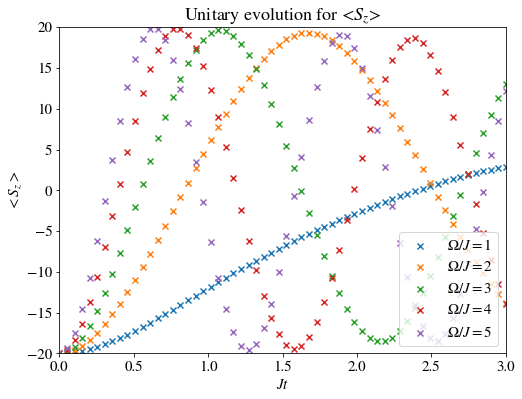

In [34]:
plt.scatter(J*t,Omega1,label="$\Omega/J=1$",marker="x")
plt.scatter(J*t,Omega2,label="$\Omega/J=2$",marker="x")
plt.scatter(J*t,Omega3,label="$\Omega/J=3$",marker="x")
plt.scatter(J*t,Omega4,label="$\Omega/J=4$",marker="x")
plt.scatter(J*t,Omega5,label="$\Omega/J=5$",marker="x")

#set Gamma_phi/J=0.2

plt.title("Unitary evolution for <$S_z$>")
plt.xlabel("$Jt$")
plt.ylabel("$<S_z>$")
plt.xlim(0,3)
plt.ylim(-20,20)

plt.legend(loc='lower right')


<img src="Capture.png" style="width:500px;height:280px"/>